In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

In [11]:
import torchvision
import torchvision.transforms as T

mnist_train = torchvision.datasets.MNIST("../data", train=True, download=True, transform=T.Compose((T.ToTensor(), torch.flatten)))
mnist_test = torchvision.datasets.MNIST("../data", train=False, download=False, transform=T.Compose((T.ToTensor(), torch.flatten)))

In [12]:
mnist_train[0][0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
mnist_train[0][1]

5

In [14]:
mnist_train[0][0].shape

torch.Size([784])

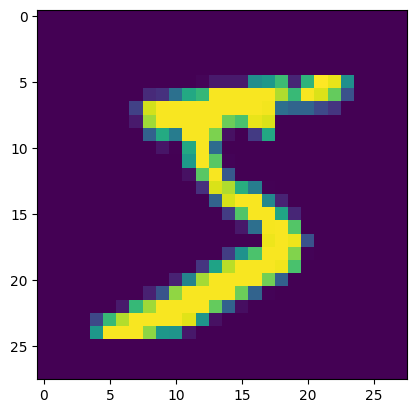

In [15]:
plt.imshow(mnist_train[0][0].view([28, 28]))

In [16]:
data = [x[0] for x in mnist_train]
data

[tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [22]:
data_T = torch.tensor(np.array(data)).float()
data_T.shape

torch.Size([60000, 784])

In [24]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

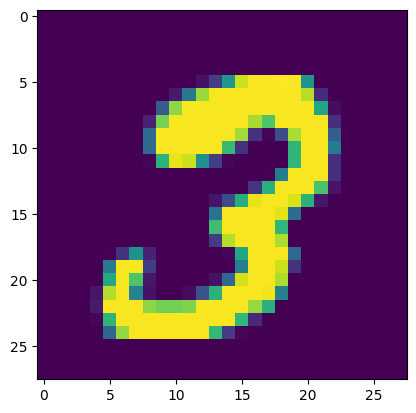

In [25]:
sample_img = data_T[12345].view([28, 28])
plt.imshow(sample_img)

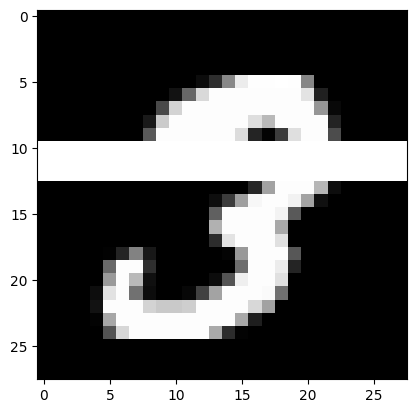

In [28]:
import copy
occluded_img = copy.deepcopy(sample_img)
occluded_img[10:13,:] = 1
plt.imshow(occluded_img, cmap="gray")

In [29]:
def create_mnist_model():
    class MNISTAE(nn.Module):
        def __init__(self, *args, **kwargs) -> None:
            super().__init__(*args, **kwargs)
            self.input = nn.Linear(784, 250)
            self.enc = nn.Linear(250, 50)
            self.lat = nn.Linear(50, 250)
            self.dec = nn.Linear(250, 784)
        def forward(self, x):
            x = torch.relu(self.input(x))
            x = torch.relu(self.enc(x))
            x = torch.relu(self.lat(x))
            y = torch.sigmoid(self.dec(x))
            return y
    net = MNISTAE()
    lossfunc = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=.001)
    return net, lossfunc, optimizer

In [39]:
## Test model
net, lossfunc, optimizer = create_mnist_model()
x = torch.rand([5, 784])
y = net(sample_img.flatten()[None, :])
x.shape, y.shape

(torch.Size([5, 784]), torch.Size([1, 784]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

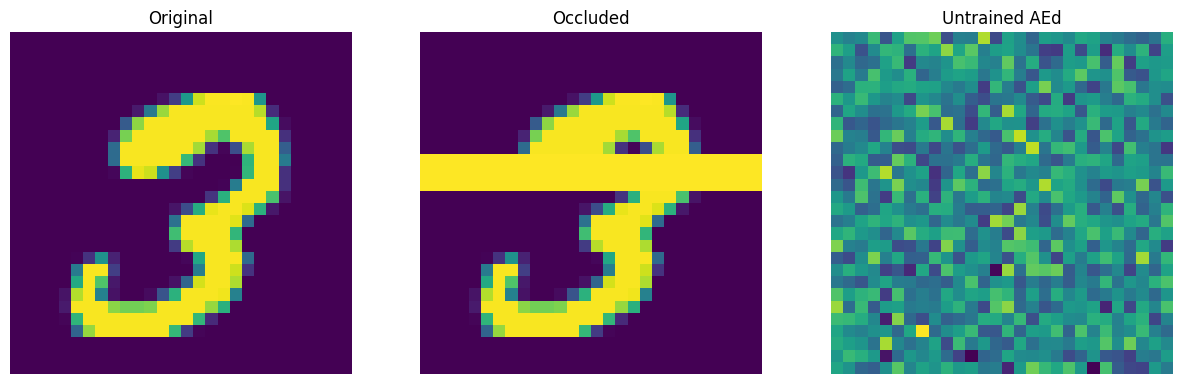

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sample_img)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(occluded_img)
ax[1].set_title("Occluded")
ax[1].axis("off")
ax[2].imshow(y[0].detach().view([28, 28]))
ax[2].set_title("Untrained AEd")
ax[2].axis("off")

In [63]:
batch_size = 32
epochs = 5
import sys
def train_model():
    net, lossfunc, optimizer = create_mnist_model()
    losses = [None] * epochs
    for ei in range(epochs):
        for i in range(int(data_T.shape[0]/batch_size)):
            x = data_T[i*batch_size:i*batch_size+batch_size]
            y = net(x)
            loss = lossfunc(y, x)
            losses[ei] = loss.detach().item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        sys.stdout.write("\r" + f"Epoch {ei+1}/{epochs}")
    return net, losses

In [64]:
net, losses = train_model()

Epoch 5/5

In [65]:
sample_img = data_T[12345].view([28, 28])
occluded_img = copy.deepcopy(sample_img)
occluded_img[10:13,:] = 1

y = net(data_T[12345])
trained_ae_img = y.detach().view([28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

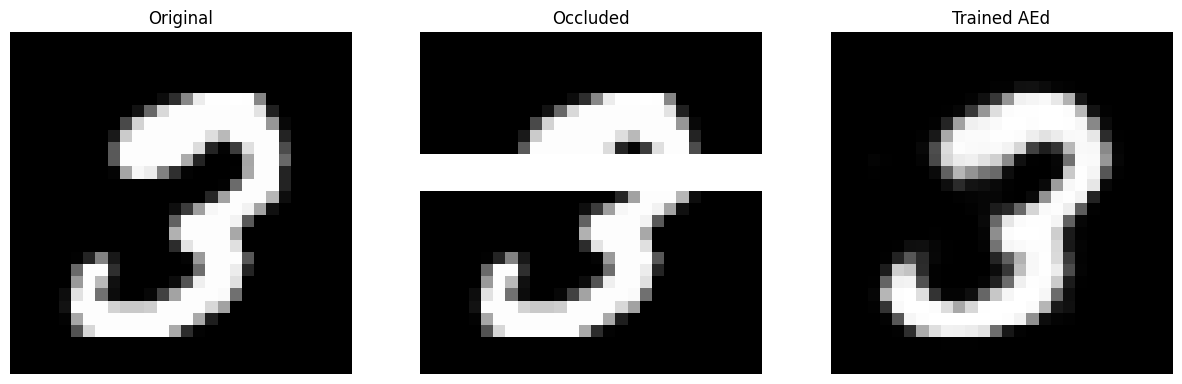

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sample_img, cmap="grey")
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(occluded_img, cmap="grey")
ax[1].set_title("Occluded")
ax[1].axis("off")
ax[2].imshow(trained_ae_img, cmap="grey")
ax[2].set_title("Trained AEd")
ax[2].axis("off")

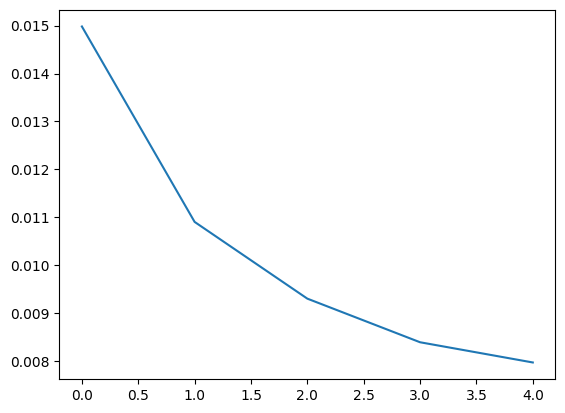

In [68]:
plt.plot(losses)
plt.show()